<a href="https://colab.research.google.com/github/HeribertoGodoy/Tareas-EIE-401-/blob/main/Actividades/Actividad%203/Actividad_3_GodoyHeriberto_203197551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Heriberto Godoy</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos muestra una onda senoidal.


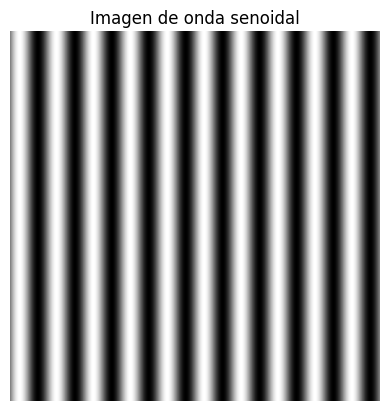

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones de la imagen
width = 512
height = 512

# Frecuencia y amplitud de la onda senoidal
frequency = 10  # Frecuencia de la onda senoidal en ciclos por imagen
amplitude = 255  # Amplitud de la onda senoidal

# Generar coordenadas X y Y para la imagen
x = np.linspace(0, width, width)
y = np.linspace(0, height, height)
X, Y = np.meshgrid(x, y)

# Generar la onda senoidal
wave_image = amplitude * np.sin(2 * np.pi * frequency * X / width)

# Mostrar la imagen de la onda senoidal
plt.imshow(wave_image, cmap='gray')
plt.title('Imagen de onda senoidal')
plt.axis('off')  # Desactivar ejes
plt.show()


## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


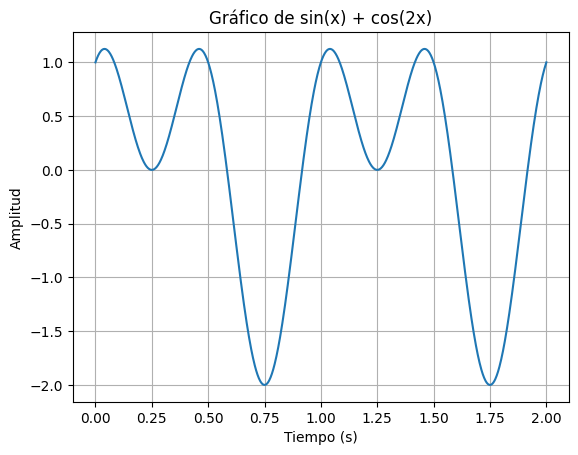

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2, 1000)  # Tiempo de 0 a 1 segundos
f1 = 1  # Frecuencia de la senoide (en Hz)
A1 = 1  # Amplitud de la senoide
f2 = 1  # Frecuencia de la cosenoide
A2 = 1  # Amplitud de la cosenoide

# Definición de las funciones
seno = A1 * np.sin(2 * np.pi * f1 * t)
coseno = A2 * np.cos(2 * (2 * np.pi * f2 * t))

# Funcion pedida en el enunciado
funcion = seno + coseno

# Graficar la señal
plt.plot(t, funcion, label='sin(x) + cos(2x)')  # Usar t y funcion
plt.xlabel('Tiempo (s)')  # Etiqueta del eje x
plt.ylabel('Amplitud')  # Etiqueta del eje y
plt.title('Gráfico de sin(x) + cos(2x)')  # Título del gráfico
plt.grid(True)  # Mostrar la cuadrícula
plt.show()  # Mostrar el gráfico


### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

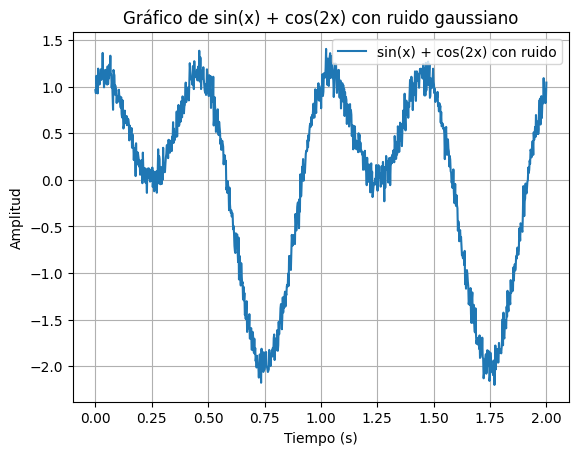

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros de la señal
t = np.linspace(0, 2, 1000)  # Tiempo de 0 a 2 segundos
f1 = 1  # Frecuencia de la senoide (en Hz)
A1 = 1  # Amplitud de la senoide
f2 = 1  # Frecuencia de la cosenoide
A2 = 1  # Amplitud de la cosenoide

# Definición de las funciones
seno = A1 * np.sin(2 * np.pi * f1 * t)
coseno = A2 * np.cos(2 * (2 * np.pi * f2 * t))

# Función pedida en el enunciado
funcion = seno + coseno

# Agregar ruido gaussiano
ruido = np.random.normal(0, 0.1, len(t))  # Generar ruido gaussiano con media 0 y desviación estándar 0.1
funcion_con_ruido = funcion + ruido  # Sumar ruido a la señal original

# Graficar la señal con ruido
plt.plot(t, funcion_con_ruido, label='sin(x) + cos(2x) con ruido')  # Usar t y funcion_con_ruido
plt.xlabel('Tiempo (s)')  # Etiqueta del eje x
plt.ylabel('Amplitud')  # Etiqueta del eje y
plt.title('Gráfico de sin(x) + cos(2x) con ruido gaussiano')  # Título del gráfico
plt.grid(True)  # Mostrar la cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar el gráfico



## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


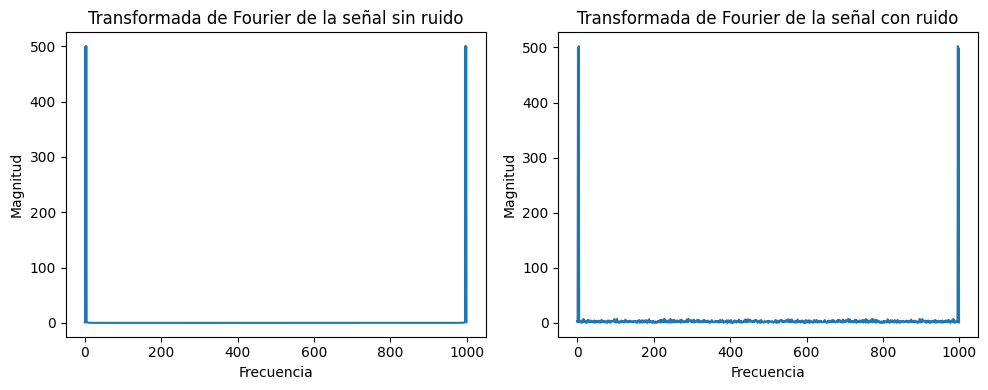

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal y los parámetros
t = np.linspace(0, 2, 1000)  # Tiempo de 0 a 2 segundos
f1 = 1  # Frecuencia de la senoide (en Hz)
A1 = 1  # Amplitud de la senoide
f2 = 1  # Frecuencia de la cosenoide
A2 = 1  # Amplitud de la cosenoide

# Definir las funciones
seno = A1 * np.sin(2 * np.pi * f1 * t)
coseno = A2 * np.cos(2 * (2 * np.pi * f2 * t))
funcion = seno + coseno  # Señal sin ruido

# Función para calcular la DFT
def calcular_dft(signal):
    N = len(signal)
    dft_result = []
    for k in range(N):
        X_k = 0
        for n in range(N):
            X_k += signal[n] * np.exp(-2j * np.pi * k * n / N)
        dft_result.append(X_k)
    return dft_result

# Calcular DFT de la señal sin ruido
dft_sin_ruido = calcular_dft(funcion)

# Generar ruido gaussiano
ruido = np.random.normal(0, 0.1, len(t))  # Generar ruido gaussiano con media 0 y desviación estándar 0.1
funcion_con_ruido = funcion + ruido  # Sumar ruido a la señal original

# Calcular DFT de la señal con ruido
dft_con_ruido = calcular_dft(funcion_con_ruido)

# Graficar la parte real de las transformadas de Fourier
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.abs(dft_sin_ruido))
plt.title('Transformada de Fourier de la señal sin ruido')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.subplot(1, 2, 2)
plt.plot(np.abs(dft_con_ruido))
plt.title('Transformada de Fourier de la señal con ruido')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.tight_layout()
plt.show()

### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

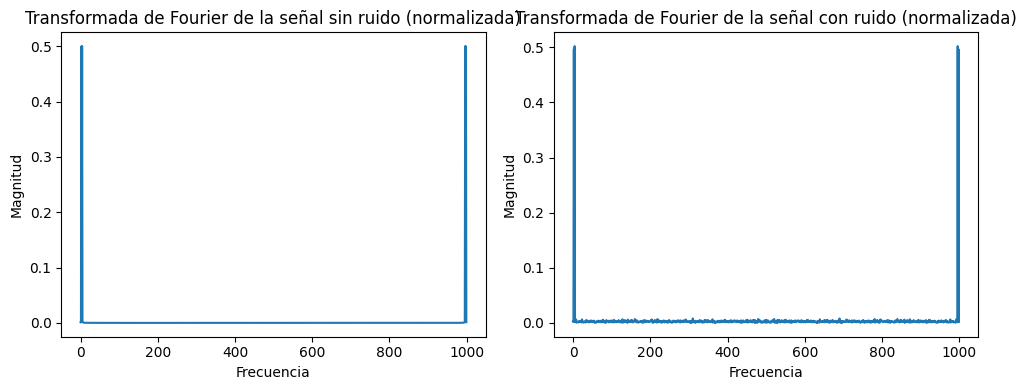

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal y los parámetros
t = np.linspace(0, 2, 1000)  # Tiempo de 0 a 2 segundos
f1 = 1  # Frecuencia de la senoide (en Hz)
A1 = 1  # Amplitud de la senoide
f2 = 1  # Frecuencia de la cosenoide
A2 = 1  # Amplitud de la cosenoide

# Definir las funciones
seno = A1 * np.sin(2 * np.pi * f1 * t)
coseno = A2 * np.cos(2 * (2 * np.pi * f2 * t))
funcion = seno + coseno  # Señal sin ruido

# Función para calcular la DFT
def calcular_dft(signal):
    N = len(signal)
    dft_result = []
    for k in range(N):
        X_k = 0
        for n in range(N):
            X_k += signal[n] * np.exp(-2j * np.pi * k * n / N)
        dft_result.append(X_k / N)  # Normalización
    return dft_result

# Calcular DFT de la señal sin ruido
dft_sin_ruido = calcular_dft(funcion)

# Generar ruido gaussiano
ruido = np.random.normal(0, 0.1, len(t))  # Generar ruido gaussiano con media 0 y desviación estándar 0.1
funcion_con_ruido = funcion + ruido  # Sumar ruido a la señal original

# Calcular DFT de la señal con ruido
dft_con_ruido = calcular_dft(funcion_con_ruido)

# Graficar la parte real de las transformadas de Fourier
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.abs(dft_sin_ruido))
plt.title('Transformada de Fourier de la señal sin ruido (normalizada)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.subplot(1, 2, 2)
plt.plot(np.abs(dft_con_ruido))
plt.title('Transformada de Fourier de la señal con ruido (normalizada)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.tight_layout()
plt.show()


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

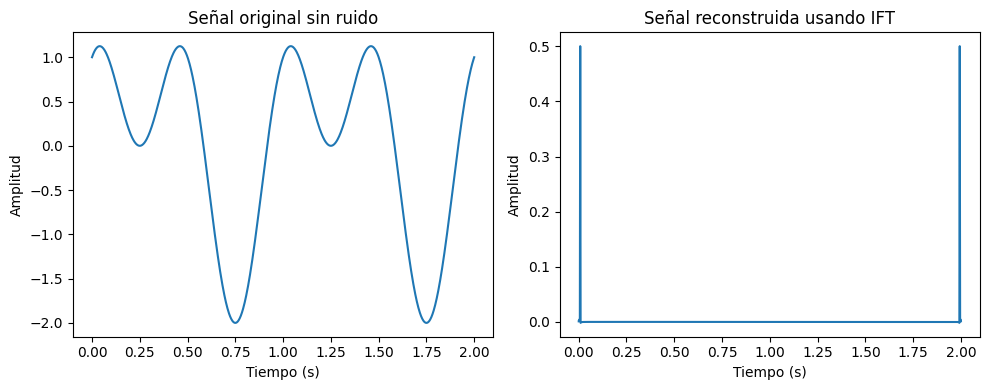

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal y los parámetros
t = np.linspace(0, 2, 1000)  # Tiempo de 0 a 2 segundos
f1 = 1  # Frecuencia de la senoide (en Hz)
A1 = 1  # Amplitud de la senoide
f2 = 1  # Frecuencia de la cosenoide
A2 = 1  # Amplitud de la cosenoide

# Definir la función sin ruido
funcion_sin_ruido = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.cos(2 * (2 * np.pi * f2 * t))

# Calcular la transformada inversa de Fourier
ifft_result = np.fft.ifft(funcion_sin_ruido)

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, funcion_sin_ruido)
plt.title('Señal original sin ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.subplot(1, 2, 2)
plt.plot(t, np.real(ifft_result))
plt.title('Señal reconstruida usando IFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

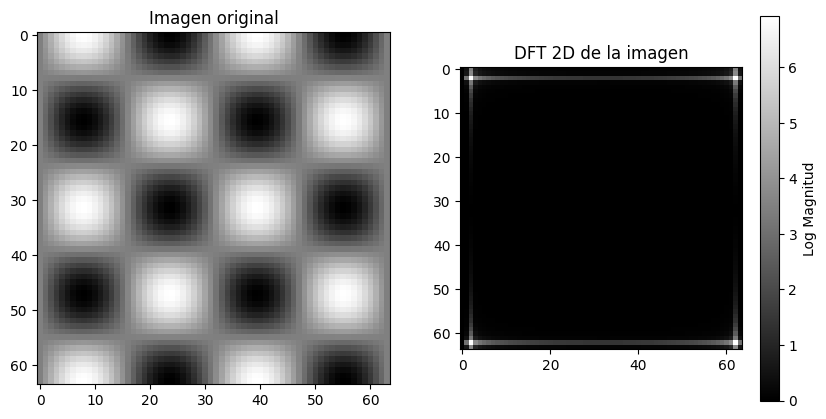

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def dft2d(image):
    M, N = image.shape
    dft_result = np.zeros((M, N), dtype=np.complex128)
    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    sum_value += image[x, y] * np.exp(-2j * np.pi * ((u * x) / M + (v * y) / N))
            dft_result[u, v] = sum_value
    return dft_result

# Generar una imagen de ejemplo
N = 64  # Tamaño de la imagen reducido para mejorar la velocidad
x = np.linspace(0, 4*np.pi, N)
y = np.linspace(0, 4*np.pi, N)
X, Y = np.meshgrid(x, y)
image = np.sin(X) * np.cos(Y)  # Imagen de ejemplo

# Calcular la DFT 2D de la imagen
dft_image = dft2d(image)

# Mostrar la imagen original y su DFT 2D
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(dft_image) + 1), cmap='gray')  # Mostrar el logaritmo de la magnitud de la DFT para una mejor visualización
plt.title('DFT 2D de la imagen')
plt.colorbar(label='Log Magnitud')
plt.show()




### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

1. El ruido en el dominio temporal afecta directamente la forma y la amplitud de la señal en función del tiempo, mientras que al observar la señal con ruido en el dominio frecuencial, podemos identificar las frecuencias asociadas tanto con la señal original como con el ruido añadido. Esta representación en el dominio frecuencial es útil para el análisis y la caracterización de la señal y puede ayudar en la tarea de separar la señal deseada del ruido no deseado.

2. El resultado de la transformada de Fourier nos ayuda a comprender la composición frecuencial de la señal y puede ser útil para analizar y filtrar la señal, así como para identificar la presencia de ruido o artefactos no deseados. En la visualización de la transformada de Fourier, los peaks significativos en el espectro de frecuencia son indicativos de las componentes frecuenciales dominantes en la señal, mientras que el ruido y otras componentes no deseadas pueden aparecer como estructuras menos definidas o de menor amplitud.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html